In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from gnninterpreter import *

/home/du0/20CS30037/miniconda3/envs/gnn_inter/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import torch

# Mutag

In [4]:
dataset = MUTAGDataset(seed=100)

In [5]:
model = GCNClassifier(node_features=len(dataset.NODE_CLS),
                      num_classes=len(dataset.GRAPH_CLS),
                      hidden_channels=64,
                      num_layers=3)

In [6]:
model.load_state_dict(torch.load('ckpts/mutag.pt'))

<All keys matched successfully>

In [7]:
dataset.evaluate_model(model)

/home/du0/20CS30037/miniconda3/envs/gnn_inter/lib/python3.11/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


class idx: 0, class: nonmutagen, f1: 0.8799999952316284
class idx: 1, class: mutagen, f1: 0.9402390718460083


{'nonmutagen': 0.8799999952316284, 'mutagen': 0.9402390718460083}

In [8]:
mean_embeds = dataset.mean_embeddings(model)

In [9]:
trainer = {}
sampler = {}

# Mutagen

In [10]:
cls_idx = 1
trainer[cls_idx] = Trainer(
    sampler=(s := GraphSampler(
        max_nodes=20,
        num_node_cls=len(dataset.NODE_CLS),
        num_edge_cls=len(dataset.EDGE_CLS),
        temperature=0.15,
        learn_node_feat=True,
        learn_edge_feat=True,
    )),
    discriminator=model,
    criterion=WeightedCriterion([
        dict(key="logits", criterion=ClassScoreCriterion(class_idx=cls_idx, mode='maximize'), weight=1),
        dict(key="embeds", criterion=EmbeddingCriterion(target_embedding=mean_embeds[cls_idx]), weight=10),
        dict(key="logits", criterion=MeanPenalty(), weight=0),
        dict(key="omega", criterion=NormPenalty(order=1), weight=1),
        dict(key="omega", criterion=NormPenalty(order=2), weight=1),
        dict(key="xi", criterion=NormPenalty(order=1), weight=0),
        dict(key="xi", criterion=NormPenalty(order=2), weight=0),
        # dict(key="eta", criterion=NormPenalty(order=1), weight=0),
        # dict(key="eta", criterion=NormPenalty(order=2), weight=0),
        dict(key="theta_pairs", criterion=KLDivergencePenalty(binary=True), weight=0),
    ]),
    optimizer=(o := torch.optim.SGD(s.parameters(), lr=1)),
    scheduler=torch.optim.lr_scheduler.ExponentialLR(o, gamma=1),
    dataset=dataset,
    budget_penalty=BudgetPenalty(budget=30, order=1, beta=1),
    target_probs={cls_idx: (0.9, 1)},
    k_samples=16
)

In [11]:
trainer[1].train(2000)

  0%|          | 0/2000 [00:00<?, ?it/s]


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fca10698f40>


  0%|          | 1/2000 [00:02<1:16:39,  2.30s/it, size=90.6, bpw=1.1, nonmutagen=-2.31, mutagen=2.29]

iteration=0, loss=363.96, size=90.60517883300781, scores={'nonmutagen': -2.308521032333374, 'mutagen': 2.2900924682617188}


  0%|          | 2/2000 [00:02<39:55,  1.20s/it, size=80.6, bpw=1.46, nonmutagen=-143, mutagen=142]   


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fc91f564c70>
iteration=1, loss=243.77, size=86.2168960571289, scores={'nonmutagen': -34.138832092285156, 'mutagen': 34.04087829589844}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fca10698f40>
iteration=2, loss=161.19, size=83.36599731445312, scores={'nonmutagen': -47.278472900390625, 'mutagen': 47.14339828491211}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fc91f564c70>


  0%|          | 4/2000 [00:02<16:36,  2.00it/s, size=83.2, bpw=1.61, nonmutagen=-175, mutagen=175]

iteration=3, loss=85.06, size=80.55712127685547, scores={'nonmutagen': -142.88119506835938, 'mutagen': 142.47604370117188}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fca10698f40>
iteration=4, loss=70.06, size=83.22259521484375, scores={'nonmutagen': -175.13563537597656, 'mutagen': 174.63934326171875}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fc91f564c70>


  0%|          | 6/2000 [00:03<12:09,  2.73it/s, size=81, bpw=1.77, nonmutagen=-161, mutagen=160]  

iteration=5, loss=75.08, size=80.99732208251953, scores={'nonmutagen': -160.93251037597656, 'mutagen': 160.4763641357422}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fca10698f40>


  0%|          | 7/2000 [00:04<21:59,  1.51it/s, size=78.1, bpw=1.95, nonmutagen=-149, mutagen=149]

iteration=6, loss=75.49, size=78.11817932128906, scores={'nonmutagen': -149.141357421875, 'mutagen': 148.71852111816406}


  0%|          | 7/2000 [00:06<21:59,  1.51it/s, size=75.2, bpw=2.14, nonmutagen=-171, mutagen=171]


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fc91f564c70>


  0%|          | 8/2000 [00:06<28:58,  1.15it/s, size=75.2, bpw=2.14, nonmutagen=-171, mutagen=171]

iteration=7, loss=44.52, size=75.2033920288086, scores={'nonmutagen': -171.35691833496094, 'mutagen': 170.87130737304688}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fca10698f40>


  0%|          | 9/2000 [00:07<32:51,  1.01it/s, size=75.9, bpw=2.36, nonmutagen=-175, mutagen=174]

iteration=8, loss=48.54, size=75.93437957763672, scores={'nonmutagen': -174.8448944091797, 'mutagen': 174.34942626953125}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fc91f564c70>


  1%|          | 11/2000 [00:09<28:56,  1.15it/s, size=72.7, bpw=2.85, nonmutagen=-188, mutagen=187]

iteration=9, loss=73.18, size=72.41999816894531, scores={'nonmutagen': -179.57705688476562, 'mutagen': 179.06822204589844}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fca10698f40>
iteration=10, loss=78.90, size=72.74222564697266, scores={'nonmutagen': -187.85385131835938, 'mutagen': 187.32164001464844}


  1%|          | 13/2000 [00:09<17:06,  1.94it/s, size=67, bpw=3.45, nonmutagen=-215, mutagen=214]  


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fc91f564c70>
iteration=11, loss=83.01, size=71.50960540771484, scores={'nonmutagen': -178.1992645263672, 'mutagen': 177.6943359375}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fca10698f40>
iteration=12, loss=97.24, size=66.96233367919922, scores={'nonmutagen': -215.1009979248047, 'mutagen': 214.49180603027344}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fc91f564c70>


  1%|          | 16/2000 [00:09<09:49,  3.37it/s, size=65.5, bpw=4.59, nonmutagen=-221, mutagen=220]

iteration=13, loss=94.82, size=69.69660186767578, scores={'nonmutagen': -196.96392822265625, 'mutagen': 196.40599060058594}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fca10698f40>
iteration=14, loss=118.63, size=68.13211822509766, scores={'nonmutagen': -186.58201599121094, 'mutagen': 186.05340576171875}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fc91f564c70>
iteration=15, loss=127.88, size=65.50025939941406, scores={'nonmutagen': -220.9627227783203, 'mutagen': 220.33697509765625}


  1%|          | 18/2000 [00:10<07:09,  4.61it/s, size=53.7, bpw=5.56, nonmutagen=-210, mutagen=209]


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fca10698f40>
iteration=16, loss=160.86, size=63.39933776855469, scores={'nonmutagen': -210.30743408203125, 'mutagen': 209.7117919921875}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fc91f564c70>
iteration=17, loss=147.75, size=53.71677017211914, scores={'nonmutagen': -209.51773071289062, 'mutagen': 208.92431640625}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fca10698f40>


  1%|          | 20/2000 [00:10<05:49,  5.67it/s, size=37.6, bpw=7.4, nonmutagen=-219, mutagen=218] 

iteration=18, loss=159.10, size=50.84556198120117, scores={'nonmutagen': -173.39796447753906, 'mutagen': 172.90658569335938}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fc91f564c70>
iteration=19, loss=192.88, size=46.68825912475586, scores={'nonmutagen': -185.7384796142578, 'mutagen': 185.21224975585938}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fca10698f40>


  1%|          | 22/2000 [00:10<04:52,  6.76it/s, size=30.4, bpw=8.95, nonmutagen=-148, mutagen=148]

iteration=20, loss=188.31, size=37.559661865234375, scores={'nonmutagen': -218.6940460205078, 'mutagen': 218.07470703125}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fc91f564c70>
iteration=21, loss=197.87, size=35.463558197021484, scores={'nonmutagen': -78.04823303222656, 'mutagen': 77.82622528076172}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fca10698f40>
iteration=22, loss=195.54, size=30.407508850097656, scores={'nonmutagen': -148.0602264404297, 'mutagen': 147.64044189453125}


  1%|▏         | 25/2000 [00:10<14:07,  2.33it/s, size=25.5, bpw=10.8, nonmutagen=-141, mutagen=140]


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fc91f564c70>
iteration=23, loss=199.09, size=41.22718048095703, scores={'nonmutagen': -78.04822540283203, 'mutagen': 77.82621765136719}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fca10698f40>
iteration=24, loss=217.57, size=25.530012130737305, scores={'nonmutagen': -140.50730895996094, 'mutagen': 140.10885620117188}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fc91f564c70>
Expected number of edges of sample: 25.530012130737305; Budget: 30
Current explanation has high prediction probability and low expected maximum number of edges. Hence, it is a good explanation.
Breaking from train loop!



True

n=4 m=2
logits=[-134.897216796875, 134.51461791992188]
probs=[0.0, 1.0]
Graph Viz info: 
No of nodes:  4
Nodes:  [(3, {'label': 'I', 'color': 'cyan'}), (8, {'label': 'I', 'color': 'cyan'}), (16, {'label': 'I', 'color': 'cyan'}), (18, {'label': 'I', 'color': 'cyan'})]
No of edges:  2
Edges:  [(3, 8, {'label': 'double', 'color': 'red', 'width': 4}), (16, 18, {'label': 'triple', 'color': 'blue', 'width': 6})]


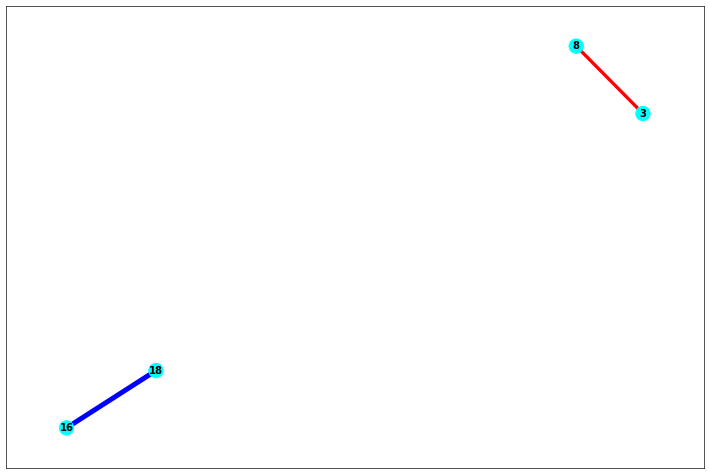

In [12]:
G = trainer[1].evaluate(threshold=0.5, show=True)

In [13]:
print(type(G))
print(G.adj)
print(G.nodes)
print(G.edges)

print('Nodes: ')
for v in list(G.nodes):
    print(G.nodes[v])

print('Edges: ')
for e in G.edges:
    print(G.edges[e])

<class 'networkx.classes.graph.Graph'>
{3: {8: {'label': 2}}, 8: {3: {'label': 2}}, 16: {18: {'label': 3}}, 18: {16: {'label': 3}}}
[3, 8, 16, 18]
[(3, 8), (16, 18)]
Nodes: 
{'label': 4}
{'label': 4}
{'label': 4}
{'label': 4}
Edges: 
{'label': 2}
{'label': 3}


# Non-Mutagen

In [14]:
cls_idx = 0
trainer[cls_idx] = Trainer(
    sampler=(s := GraphSampler(
        max_nodes=20,
        num_node_cls=len(dataset.NODE_CLS),
        num_edge_cls=len(dataset.EDGE_CLS),
        temperature=0.15,
        learn_node_feat=True,
        learn_edge_feat=True,
    )),
    discriminator=model,
    criterion=WeightedCriterion([
        dict(key="logits", criterion=ClassScoreCriterion(class_idx=cls_idx, mode='maximize'), weight=1),
        dict(key="embeds", criterion=EmbeddingCriterion(target_embedding=mean_embeds[cls_idx]), weight=10),
        dict(key="logits", criterion=MeanPenalty(), weight=0),
        dict(key="omega", criterion=NormPenalty(order=1), weight=1),
        dict(key="omega", criterion=NormPenalty(order=2), weight=1),
        dict(key="xi", criterion=NormPenalty(order=1), weight=0),
        dict(key="xi", criterion=NormPenalty(order=2), weight=0),
        # dict(key="eta", criterion=NormPenalty(order=1), weight=0),
        # dict(key="eta", criterion=NormPenalty(order=2), weight=0),
        dict(key="theta_pairs", criterion=KLDivergencePenalty(binary=True), weight=0),
    ]),
    optimizer=(o := torch.optim.SGD(s.parameters(), lr=1)),
    scheduler=torch.optim.lr_scheduler.ExponentialLR(o, gamma=1),
    dataset=dataset,
    budget_penalty=BudgetPenalty(budget=30, order=1, beta=1),
    target_probs={cls_idx: (0.9, 1)},
    k_samples=16
)

In [15]:
trainer[0].train(2000)

  0%|          | 3/2000 [00:01<15:46,  2.11it/s, size=85.2, bpw=0.993, nonmutagen=4.15, mutagen=-5.75]

iteration=0, loss=347.71, size=88.13179016113281, scores={'nonmutagen': -0.11153221130371094, 'mutagen': 0.10970878601074219}
iteration=1, loss=230.44, size=87.06294250488281, scores={'nonmutagen': -8.28653335571289, 'mutagen': 8.261615753173828}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fca10698f40>
iteration=2, loss=191.63, size=85.17781066894531, scores={'nonmutagen': 4.150286674499512, 'mutagen': -5.753929138183594}


  0%|          | 5/2000 [00:01<09:05,  3.66it/s, size=86.4, bpw=0.986, nonmutagen=1.96, mutagen=-2.58]

iteration=3, loss=172.12, size=82.03531646728516, scores={'nonmutagen': 0.4132702350616455, 'mutagen': -0.4136110544204712}
iteration=4, loss=174.11, size=89.968017578125, scores={'nonmutagen': 0.5393354892730713, 'mutagen': -0.5393202304840088}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fc91f567d30>
iteration=5, loss=173.10, size=86.4340591430664, scores={'nonmutagen': 1.9586362838745117, 'mutagen': -2.577631950378418}


  0%|          | 9/2000 [00:02<05:01,  6.61it/s, size=84.7, bpw=0.845, nonmutagen=-.392, mutagen=0.389]

iteration=6, loss=168.05, size=84.73472595214844, scores={'nonmutagen': 1.0296971797943115, 'mutagen': -1.028296709060669}
iteration=7, loss=159.49, size=88.14672088623047, scores={'nonmutagen': 0.21241271495819092, 'mutagen': -0.21332097053527832}
iteration=8, loss=163.17, size=84.73255920410156, scores={'nonmutagen': -0.39203405380249023, 'mutagen': 0.3894181251525879}


  0%|          | 9/2000 [00:02<05:01,  6.61it/s, size=89.9, bpw=0.929, nonmutagen=22.3, mutagen=-25.7] 


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fc91f567d30>
iteration=9, loss=159.24, size=89.85029602050781, scores={'nonmutagen': 22.293302536010742, 'mutagen': -25.731313705444336}


  1%|          | 11/2000 [00:03<08:07,  4.08it/s, size=83.2, bpw=1.12, nonmutagen=5.76, mutagen=-7.7] 


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fca10698f40>
iteration=10, loss=186.45, size=85.20513916015625, scores={'nonmutagen': 9.67740535736084, 'mutagen': -13.037860870361328}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fc91f567d30>
iteration=11, loss=179.51, size=83.22651672363281, scores={'nonmutagen': 5.758757591247559, 'mutagen': -7.704543590545654}


  1%|          | 13/2000 [00:04<13:40,  2.42it/s, size=93.3, bpw=1.07, nonmutagen=-.183, mutagen=0.181]

iteration=12, loss=195.62, size=93.29138946533203, scores={'nonmutagen': -0.18303251266479492, 'mutagen': 0.18100690841674805}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fc91f567d30>


  1%|          | 14/2000 [00:06<21:09,  1.56it/s, size=82.5, bpw=1.18, nonmutagen=7.42, mutagen=-11.6] 

iteration=13, loss=214.44, size=82.49507904052734, scores={'nonmutagen': 7.423206329345703, 'mutagen': -11.577423095703125}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fca10698f40>


  1%|          | 15/2000 [00:07<28:14,  1.17it/s, size=86.6, bpw=1.29, nonmutagen=6.01, mutagen=-7.85]

iteration=14, loss=198.84, size=86.61785125732422, scores={'nonmutagen': 6.008406639099121, 'mutagen': -7.852141857147217}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fc91f567d30>


  1%|          | 16/2000 [00:09<33:47,  1.02s/it, size=84.5, bpw=1.42, nonmutagen=13.5, mutagen=-16]  

iteration=15, loss=224.34, size=84.53443908691406, scores={'nonmutagen': 13.530402183532715, 'mutagen': -16.00234031677246}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fca10698f40>


  1%|          | 17/2000 [00:11<40:28,  1.22s/it, size=83.5, bpw=1.56, nonmutagen=6.43, mutagen=-10.5]

iteration=16, loss=192.82, size=83.54090881347656, scores={'nonmutagen': 6.431065559387207, 'mutagen': -10.496864318847656}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fc91f567d30>


  1%|          | 18/2000 [00:12<45:05,  1.36s/it, size=79.5, bpw=1.72, nonmutagen=8.09, mutagen=-9.82]

iteration=17, loss=219.36, size=79.4609146118164, scores={'nonmutagen': 8.088109970092773, 'mutagen': -9.821914672851562}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fca10698f40>


  1%|          | 19/2000 [00:14<46:59,  1.42s/it, size=80.1, bpw=1.89, nonmutagen=2.7, mutagen=-2.95] 

iteration=18, loss=225.92, size=80.09159851074219, scores={'nonmutagen': 2.6985321044921875, 'mutagen': -2.946887254714966}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fc91f567d30>


  1%|          | 20/2000 [00:15<45:53,  1.39s/it, size=76.5, bpw=2.08, nonmutagen=10, mutagen=-11.7] 

iteration=19, loss=227.04, size=76.542236328125, scores={'nonmutagen': 10.044233322143555, 'mutagen': -11.696767807006836}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fca10698f40>


  1%|          | 21/2000 [00:17<48:48,  1.48s/it, size=75.2, bpw=2.29, nonmutagen=2.36, mutagen=-2.41]

iteration=20, loss=264.47, size=75.23487854003906, scores={'nonmutagen': 2.364971399307251, 'mutagen': -2.4117331504821777}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fc91f567d30>


  1%|          | 22/2000 [00:19<48:39,  1.48s/it, size=74.5, bpw=2.52, nonmutagen=7.22, mutagen=-8.55]

iteration=21, loss=264.72, size=74.52073669433594, scores={'nonmutagen': 7.223843574523926, 'mutagen': -8.551494598388672}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fca10698f40>


  1%|          | 23/2000 [00:20<49:45,  1.51s/it, size=76.6, bpw=2.77, nonmutagen=15.3, mutagen=-16.9]

iteration=22, loss=276.14, size=76.6222152709961, scores={'nonmutagen': 15.26323127746582, 'mutagen': -16.873306274414062}


  1%|          | 24/2000 [00:22<51:06,  1.55s/it, size=75.5, bpw=2.63, nonmutagen=0.686, mutagen=-.687]

iteration=23, loss=277.51, size=75.49918365478516, scores={'nonmutagen': 0.6858832836151123, 'mutagen': -0.6872203350067139}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fca10698f40>


  1%|▏         | 25/2000 [00:23<52:24,  1.59s/it, size=74.4, bpw=2.9, nonmutagen=2.18, mutagen=-2.47]  

iteration=24, loss=269.72, size=74.43510437011719, scores={'nonmutagen': 2.1766695976257324, 'mutagen': -2.4736380577087402}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fc91f567d30>


  1%|▏         | 26/2000 [00:25<51:17,  1.56s/it, size=70.8, bpw=3.19, nonmutagen=2.42, mutagen=-3.57]

iteration=25, loss=286.20, size=70.76129150390625, scores={'nonmutagen': 2.419888973236084, 'mutagen': -3.572263240814209}


  1%|▏         | 27/2000 [00:26<48:45,  1.48s/it, size=72.9, bpw=3.03, nonmutagen=-1.53, mutagen=1.52]

iteration=26, loss=288.79, size=72.90581512451172, scores={'nonmutagen': -1.5250086784362793, 'mutagen': 1.5191919803619385}


  1%|▏         | 28/2000 [00:28<49:00,  1.49s/it, size=72.5, bpw=2.87, nonmutagen=-3.12, mutagen=3.11]

iteration=27, loss=258.77, size=72.52670288085938, scores={'nonmutagen': -3.1206886768341064, 'mutagen': 3.1103639602661133}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fca10698f40>


  1%|▏         | 29/2000 [00:29<49:35,  1.51s/it, size=75.1, bpw=3.16, nonmutagen=2.02, mutagen=-2.02]

iteration=28, loss=251.40, size=75.07456970214844, scores={'nonmutagen': 2.023547410964966, 'mutagen': -2.019339084625244}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fc91f567d30>


  2%|▏         | 30/2000 [00:31<50:18,  1.53s/it, size=69, bpw=3.48, nonmutagen=14.7, mutagen=-16.7]  

iteration=29, loss=302.34, size=69.02936553955078, scores={'nonmutagen': 14.741676330566406, 'mutagen': -16.662561416625977}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fca10698f40>


  2%|▏         | 31/2000 [00:33<53:46,  1.64s/it, size=68.8, bpw=3.83, nonmutagen=2.01, mutagen=-2.01]

iteration=30, loss=285.81, size=68.84420776367188, scores={'nonmutagen': 2.0089218616485596, 'mutagen': -2.0057826042175293}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fc91f567d30>


  2%|▏         | 32/2000 [00:35<54:57,  1.68s/it, size=66.1, bpw=4.21, nonmutagen=3.69, mutagen=-3.94]

iteration=31, loss=368.84, size=66.11680603027344, scores={'nonmutagen': 3.6910665035247803, 'mutagen': -3.935795783996582}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fca10698f40>


  2%|▏         | 33/2000 [00:36<50:02,  1.53s/it, size=65.4, bpw=4.63, nonmutagen=52.6, mutagen=-60.7]

iteration=32, loss=364.75, size=65.3753433227539, scores={'nonmutagen': 52.64518737792969, 'mutagen': -60.718177795410156}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fc91f567d30>


  2%|▏         | 34/2000 [00:37<51:52,  1.58s/it, size=62.4, bpw=5.09, nonmutagen=1.61, mutagen=-1.59]

iteration=33, loss=365.16, size=62.42958068847656, scores={'nonmutagen': 1.6105146408081055, 'mutagen': -1.5919419527053833}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fca10698f40>


  2%|▏         | 35/2000 [00:39<52:57,  1.62s/it, size=55.6, bpw=5.6, nonmutagen=13.1, mutagen=-16.8] 

iteration=34, loss=365.95, size=55.59840393066406, scores={'nonmutagen': 13.08344841003418, 'mutagen': -16.811914443969727}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fc91f567d30>


  2%|▏         | 36/2000 [00:41<51:35,  1.58s/it, size=51.4, bpw=6.16, nonmutagen=72.3, mutagen=-80.1]

iteration=35, loss=355.94, size=51.35481262207031, scores={'nonmutagen': 72.30357360839844, 'mutagen': -80.12410736083984}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fca10698f40>


  2%|▏         | 37/2000 [00:42<52:03,  1.59s/it, size=41, bpw=6.78, nonmutagen=2.34, mutagen=-3.07]  

iteration=36, loss=376.79, size=40.989532470703125, scores={'nonmutagen': 2.341585874557495, 'mutagen': -3.0665817260742188}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fc91f567d30>


  2%|▏         | 38/2000 [00:44<51:35,  1.58s/it, size=36, bpw=7.46, nonmutagen=82, mutagen=-89.8]  

iteration=37, loss=345.34, size=35.98994064331055, scores={'nonmutagen': 82.00273895263672, 'mutagen': -89.80708312988281}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fca10698f40>


  2%|▏         | 39/2000 [00:46<53:43,  1.64s/it, size=33.7, bpw=8.2, nonmutagen=34.9, mutagen=-38.4]

iteration=38, loss=370.47, size=33.71500015258789, scores={'nonmutagen': 34.88994598388672, 'mutagen': -38.39321517944336}


  2%|▏         | 40/2000 [00:47<52:49,  1.62s/it, size=33.2, bpw=7.79, nonmutagen=-.46, mutagen=0.457]

iteration=39, loss=437.10, size=33.1973991394043, scores={'nonmutagen': -0.45984625816345215, 'mutagen': 0.45703864097595215}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fca10698f40>


  2%|▏         | 41/2000 [00:49<51:48,  1.59s/it, size=28.7, bpw=8.57, nonmutagen=2.02, mutagen=-2.02]

iteration=40, loss=429.57, size=28.723722457885742, scores={'nonmutagen': 2.023547410964966, 'mutagen': -2.019339084625244}


  2%|▏         | 41/2000 [00:50<40:21,  1.24s/it, size=28.7, bpw=8.57, nonmutagen=2.02, mutagen=-2.02]


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7fc91f567d30>
Expected number of edges of sample: 28.723722457885742; Budget: 30
Current explanation has high prediction probability and low expected maximum number of edges. Hence, it is a good explanation.
Breaking from train loop!



True

n=4 m=2
logits=[1.3150334358215332, -1.1468019485473633]
probs=[0.9214226603507996, 0.07857734709978104]
Graph Viz info: 
No of nodes:  4
Nodes:  [(4, {'label': 'Cl', 'color': 'red'}), (7, {'label': 'C', 'color': 'orange'}), (10, {'label': 'O', 'color': 'green'}), (19, {'label': 'Br', 'color': 'yellowgreen'})]
No of edges:  2
Edges:  [(4, 7, {'label': 'triple', 'color': 'blue', 'width': 6}), (10, 19, {'label': 'aromatic', 'color': 'black', 'width': 3})]


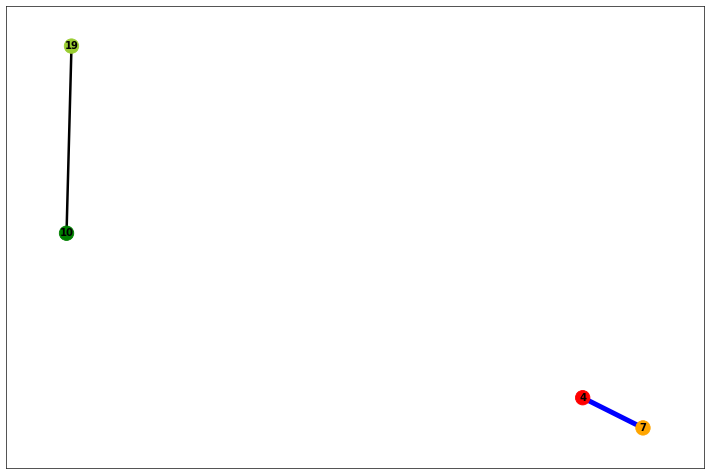

In [16]:
G = trainer[0].evaluate(threshold=0.5, show=True)

In [17]:
print(type(G))
print(G.adj)
print(G.nodes)
print(G.edges)

print('Nodes: ')
for v in list(G.nodes):
    print(G.nodes[v])
    
print('Edges: ')
for e in G.edges:
    print(G.edges[e])
    


<class 'networkx.classes.graph.Graph'>
{4: {7: {'label': 3}}, 7: {4: {'label': 3}}, 10: {19: {'label': 0}}, 19: {10: {'label': 0}}}
[4, 7, 10, 19]
[(4, 7), (10, 19)]
Nodes: 
{'label': 5}
{'label': 0}
{'label': 2}
{'label': 6}
Edges: 
{'label': 3}
{'label': 0}
